# Course Project - Subway Delay Prediction

This project is a part of the course [Machine Learning with Python: Zero to GBMs](https://zerotogbms.com).

![](https://images.unsplash.com/photo-1579645761389-360da974a0c8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1800&q=80)


The following topics are covered in this project:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis of the dataset with Matplotlib
- Performing feature engineering and preparing the dataset for training
- Scaling numeric data and encoding categorical data (no imputation as there was no missing numeric data)
- Training and interpreting decision tree and random forest models with Scikit Learn
- Training and interpreting a gradient boosting model using XGBoost
- Configuring the models and tuning hyperparameters while measuring RMSE (Root Mean Square Error)
- Creating predictions with sample inputs and saving the models

Let's begin by installing and importing the required libraries.

In [1]:
#restart the kernel after installation
!pip install numpy pandas-profiling matplotlib seaborn --quiet

In [2]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [18]:
import numpy as np

## Problem Statement

Determine how long a subway train will be delayed for, in minutes, given the [Toronto Subway Delay data](https://www.kaggle.com/jsun13/toronto-subway-delay-data?select=Toronto-Subway-Delay-Jan-2014-Jun-2021.csv).

> The Toronto subway system is part of the public transit system in the city of Toronto, Canada. The Toronto public transit system is operated by the Toronto Transit Commission (TTC). With 85 stations and more coming, the subway system connects to neighbouring municipalities and brings people together. Currently, the TTC wants to determine how long a subway train can be delayed for given multiple factors, including the time of day, what station the subway train is at, the reason for the delay, which vehicle is delayed, among other reasons.
>
>
> The subway delay data consists of data recorded between January 2014 to June 2021. 
>
> View and download the data here: https://www.kaggle.com/jsun13/toronto-subway-delay-data?select=Toronto-Subway-Delay-Jan-2014-Jun-2021.csv

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8b/TTC_subway_map_2018.png" alt="Toronto subway map" style="width: 700px;"/>

_A map of the Toronto subway system. (Source: https://en.wikipedia.org/wiki/Toronto_subway)_

## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library.

In [11]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [12]:
od.download('https://www.kaggle.com/jsun13/toronto-subway-delay-data?select=Toronto-Subway-Delay-Jan-2014-Jun-2021.csv')

Skipping, found downloaded files in "./toronto-subway-delay-data" (use force=True to force download)


You'll be asked to provide your Kaggle credentials to download the data. Follow these instructions: http://bit.ly/kaggle-creds

In [13]:
os.listdir('toronto-subway-delay-data')

['Toronto-Subway-Delay-Jan-2014-Jun-2021.csv',
 'Toronto-Subway-Delay-Codes.csv']

Let's load the data into Pandas dataframes.

In [14]:
subwayDelay_df = pd.read_csv('./toronto-subway-delay-data/Toronto-Subway-Delay-Jan-2014-Jun-2021.csv')

In [19]:
subwayDelay_df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
...,...,...,...,...,...,...,...,...,...,...
143912,2021/06/30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0
143913,2021/06/30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0
143914,2021/06/30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


## Exploring Dataset

Here are what are the column headings mean:

- Date: Year/Month/Day of when delay code is recorded
- Time: 24h of when delay code is recorded
- Day: The day of week
- Station: TTC Subway station name
- Code: Special delay codes for specific reason for possible delay
- Min Delay: How long the delay is (in minutes)
- Min Gap: How long the delayed train takes to reach next stop compared to the previous train (in minutes)
- Bound: Direction of subway travel ("North", "South", "East", West")
- Line: Subway line (BD - Bloor Danforth, YU - Yonge University, SRT - Scarborough Rapid Transit, SHP - Sheppard)	
- Vehicle: The identifier number of each subway vehicle

In [10]:
subwayDelay_df = subwayDelay_df.rename(columns={'Min Delay': 'Min_Delay', 'Min Gap': 'Min_Gap', 'Day': 'DayOfWeek'})

In [11]:
subwayDelay_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
...,...,...,...,...,...,...,...,...,...,...
143912,2021/06/30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0
143913,2021/06/30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0
143914,2021/06/30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


We're renaming some of the columns to fill in the blanks with underscores in case of any coding errors in the future. Also, we're changing "Day" to "DayOfWeek" as we are going to have two columns based on the day of the week (eg. Monday, Tuesday, etc.) and the day of the month (eg. 1st day of the month, 30th day, etc.) to see if there are any relationships between the days and delay times.

In [12]:
mostDelayedSubways = subwayDelay_df.sort_values(by='Min_Delay', ascending=False).head(15)

In [13]:
mostDelayedSubways

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle
23112,2015/02/17,06:56,Tuesday,MCCOWAN STATION TO KEN,ERHV,999,999,N,SRT,3007
2054,2014/02/05,12:35,Wednesday,MCCOWAN STATION,MRWEA,788,0,S,SRT,3012
49626,2016/05/19,16:35,Thursday,JANE STATION,MUPLA,575,579,E,BD,5291
22546,2015/02/07,15:30,Saturday,KENNEDY SRT STATION,ERHV,555,600,N,SRT,3015
98824,2018/10/20,17:44,Saturday,KENNEDY BD STATION,SUAP,515,519,E,BD,5359
112212,2019/06/25,18:48,Tuesday,WILSON TO SHEPPARD WES,PUTR,455,460,N,YU,5881
25387,2015/03/24,05:59,Tuesday,COLLEGE STATION,MUFM,452,0,N,YU,5781
123799,2020/02/13,05:30,Thursday,ST GEORGE YUS STATION,TUCC,450,453,S,YU,5776
127833,2020/05/08,16:16,Friday,ST CLAIR STATION,MUO,446,473,N,YU,5621
15293,2014/09/30,07:55,Tuesday,DUNDAS WEST STATION,PUTS,424,426,W,BD,5094


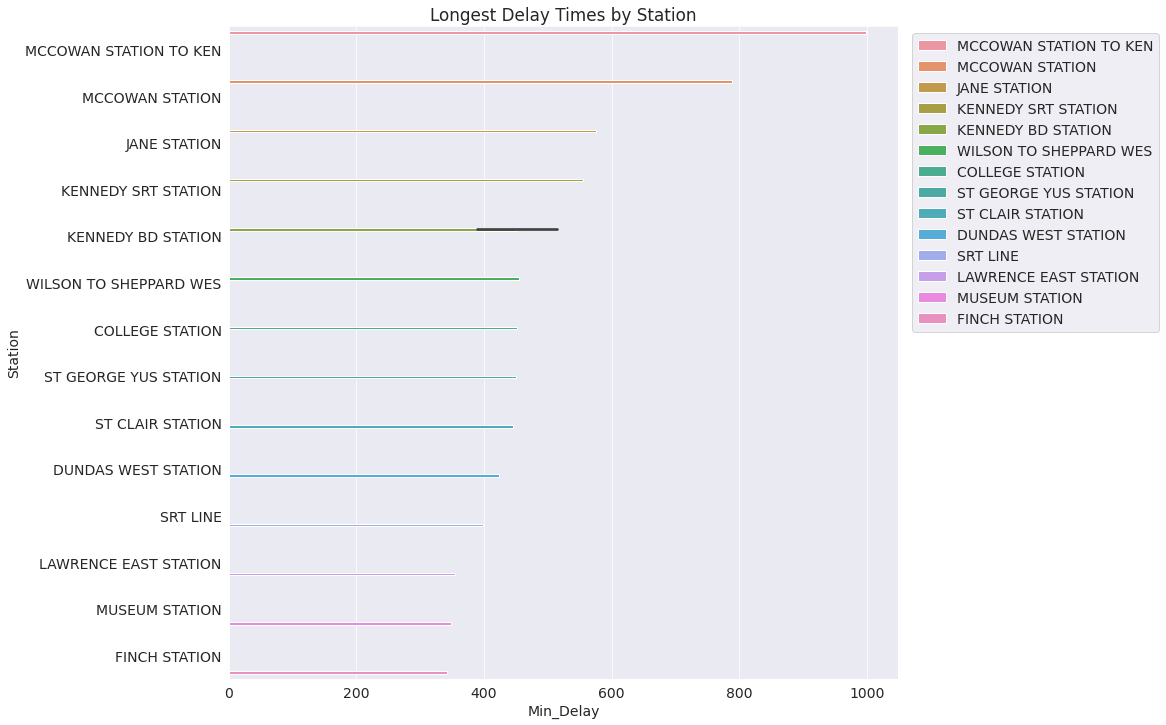

In [14]:
plt.figure(figsize=(12, 12))

sns.barplot(x = 'Min_Delay',
            y = 'Station', 
            hue = 'Station',
            data = mostDelayedSubways)

plt.title('Longest Delay Times by Station')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.5)

On 2015/02/17, McCowan Station appears to have the longest delay time, an extraordinary 999 minutes of a subway delay! Possibly, the station itself was closed at the time. Also, it's noted this graph displays which station had the "longest delay time", not necessarily which station has the "most _number_ of delays". 

In [15]:
subwayDelayCodes_df = pd.read_csv('./toronto-subway-delay-data/Toronto-Subway-Delay-Codes.csv')

In [16]:
subwayDelayCodes_df = subwayDelayCodes_df.rename(columns={'Code #': 'Code_No', 'RMENU CODE': 'RMENU_CODE', 'Vehicle Type': 'Vehicle_Type','CODE DESCRIPTION': 'CODE_DESCRIPTION'})

In [17]:
subwayDelayCodes_df

,Code_No,RMENU_CODE,Vehicle_Type,CODE_DESCRIPTION
0,1,EUAC,SUB,Air Conditioning
1,2,EUAL,SUB,Alternating Current
2,3,EUATC,SUB,ATC RC&S Equipment
3,4,EUBK,SUB,Brakes
4,5,EUBO,SUB,Body
...,...,...,...,...
195,196,TRNOA,SRT,No Operator Immediately Available
196,197,TRO,SRT,Transportation Department - Other
197,198,TRSET,SRT,Train Controls Improperly Shut Down
198,199,TRST,SRT,Storm Trains


Here we are loading the delay codes to display the specific reasons for each possible delay. Renaming the columns in the delay code file to also prevent issues with coding. Next, we'll merge the two dataframes to visualize the reasons for the longest delay times.

In [18]:
merged_subwayDelay_df = subwayDelay_df.copy()

In [19]:
merged_subwayDelay_df['CODE_DESCRIPTION'] = merged_subwayDelay_df['Code'].map(subwayDelayCodes_df.set_index('RMENU_CODE')['CODE_DESCRIPTION'])

In [20]:
merged_subwayDelay_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,CODE_DESCRIPTION
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,Priority One - Train in Contact With Person
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,Disorderly Patron
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,NaN
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,Disorderly Patron
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,Unsanitary Vehicle
...,...,...,...,...,...,...,...,...,...,...,...
143912,2021/06/30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,Injured or ill Customer (In Station) - Transpo...
143913,2021/06/30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0,Miscellaneous Other
143914,2021/06/30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0,Injured or ill Customer (In Station) - Transpo...
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171,Training Department Related Delays


In [21]:
mostDelayedSubways2 = merged_subwayDelay_df.sort_values(by='Min_Delay', ascending=False).head(15)

In [22]:
mostDelayedSubways2

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,CODE_DESCRIPTION
23112,2015/02/17,06:56,Tuesday,MCCOWAN STATION TO KEN,ERHV,999,999,N,SRT,3007,High Voltage
2054,2014/02/05,12:35,Wednesday,MCCOWAN STATION,MRWEA,788,0,S,SRT,3012,Weather Reports / Related Delays
49626,2016/05/19,16:35,Thursday,JANE STATION,MUPLA,575,579,E,BD,5291,Fire/Smoke Plan A
22546,2015/02/07,15:30,Saturday,KENNEDY SRT STATION,ERHV,555,600,N,SRT,3015,High Voltage
98824,2018/10/20,17:44,Saturday,KENNEDY BD STATION,SUAP,515,519,E,BD,5359,Assault / Patron Involved
112212,2019/06/25,18:48,Tuesday,WILSON TO SHEPPARD WES,PUTR,455,460,N,YU,5881,Rail Related Problem
25387,2015/03/24,05:59,Tuesday,COLLEGE STATION,MUFM,452,0,N,YU,5781,Force Majeure
123799,2020/02/13,05:30,Thursday,ST GEORGE YUS STATION,TUCC,450,453,S,YU,5776,Transit Control Related Problems
127833,2020/05/08,16:16,Friday,ST CLAIR STATION,MUO,446,473,N,YU,5621,Miscellaneous Other
15293,2014/09/30,07:55,Tuesday,DUNDAS WEST STATION,PUTS,424,426,W,BD,5094,Structure Related Problem


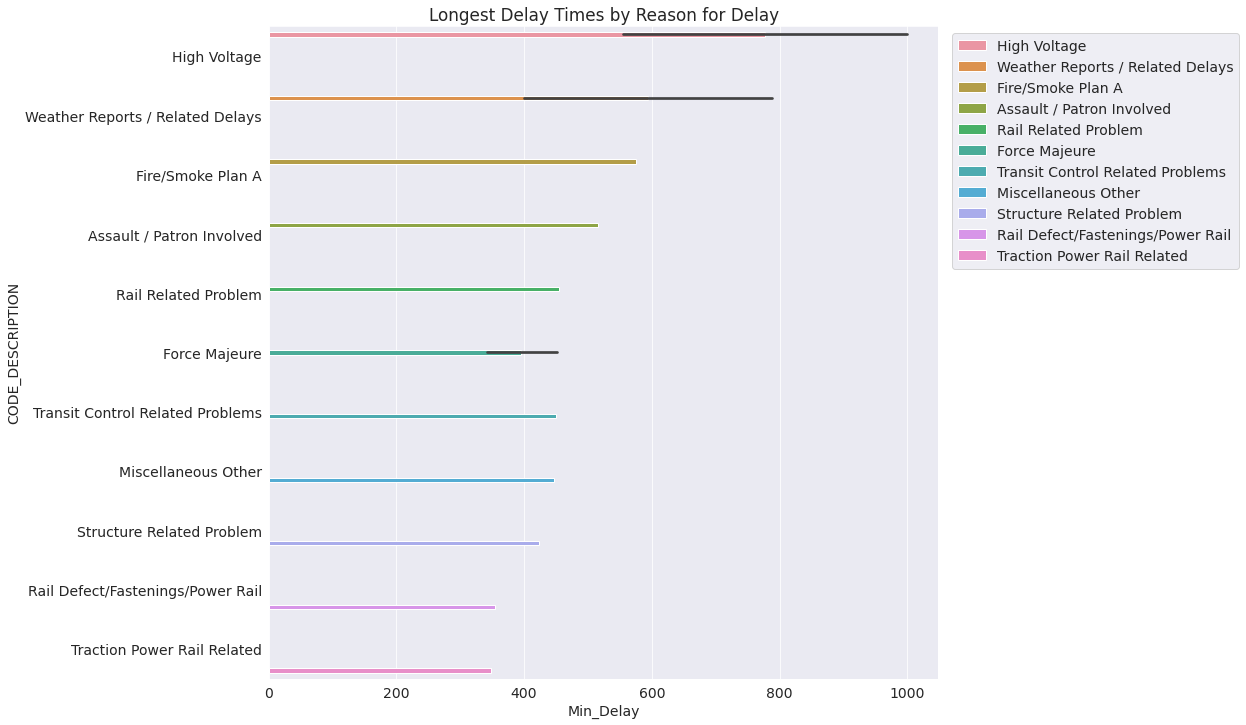

In [23]:
plt.figure(figsize=(12, 12))

sns.barplot(x = 'Min_Delay',
            y = 'CODE_DESCRIPTION', 
            hue = 'CODE_DESCRIPTION',
            data = mostDelayedSubways2)

plt.title('Longest Delay Times by Reason for Delay')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.5)

High voltage appears to be the reason for why the McCowan Station was delayed for so long. Weather related reasons, fire/smoke plans, and assault appear to be the next reasons for the extremely long delay times.

In [24]:
merged_subwayDelay_df.Station.value_counts()

KENNEDY BD STATION        6221
KIPLING STATION           6086
FINCH STATION             5193
YONGE UNIVERSITY LINE     4168
SHEPPARD WEST STATION     3756
                          ... 
WOODBINE STATION (APPR       1
GUNN THEATRE                 1
SOUTH OF MIDLAND SRT         1
SOUTH OF LAWRENCE SRT        1
ST.CLAIR WEST TO ST.A        1
Name: Station, Length: 731, dtype: int64

In [25]:
merged_subwayDelay_df.CODE_DESCRIPTION.value_counts()

Miscellaneous Speed Control                                19795
Operator Overspeeding                                      14443
Injured or ill Customer (In Station) - Transported          9886
Passenger Assistance Alarm Activated - No Trouble Found     9644
Disorderly Patron                                           7627
                                                           ...  
Signals Zone Countroller Failure                               4
EAS Failure                                                    2
Chopper Control                                                2
Wind Shield                                                    2
Labour Dispute - Subway                                        1
Name: CODE_DESCRIPTION, Length: 142, dtype: int64

Kennedy Station (BD) and Kipling Station appear to have the most number of delays, and Miscellaneous Speed Control plus Operator Overspeeding are the most common reasons for delays.

## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [26]:
subwayDelay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143917 entries, 0 to 143916
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       143917 non-null  object
 1   Time       143917 non-null  object
 2   DayOfWeek  143917 non-null  object
 3   Station    143917 non-null  object
 4   Code       143916 non-null  object
 5   Min_Delay  143917 non-null  int64 
 6   Min_Gap    143917 non-null  int64 
 7   Bound      111703 non-null  object
 8   Line       143373 non-null  object
 9   Vehicle    143917 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 11.0+ MB


### Date

First, let's extract different parts of the `Date`.

In [27]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['DayOfMonth'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [28]:
split_date(subwayDelay_df)

In [29]:
subwayDelay_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,1
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,1,1,1
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,1,1,1
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,1,1,1
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143912,2021-06-30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,2021,6,30,26
143913,2021-06-30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0,2021,6,30,26
143914,2021-06-30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0,2021,6,30,26
143915,2021-06-30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171,2021,6,30,26



### Time

Next, the hour and minute from the `Time` column will be extracted.

In [30]:
subwayDelay_df[['Hour', 'Minute']] = subwayDelay_df['Time'].str.split(":", expand=True)

In [31]:
subwayDelay_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,1,00,21
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,1,1,1,02,06
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,1,1,1,02,40
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,1,1,1,03,10
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,1,1,1,03,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143912,2021-06-30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,2021,6,30,26,01,23
143913,2021-06-30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0,2021,6,30,26,06,00
143914,2021-06-30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0,2021,6,30,26,12,40
143915,2021-06-30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171,2021,6,30,26,20,50


In [32]:
subwayDelay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143917 entries, 0 to 143916
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        143917 non-null  datetime64[ns]
 1   Time        143917 non-null  object        
 2   DayOfWeek   143917 non-null  object        
 3   Station     143917 non-null  object        
 4   Code        143916 non-null  object        
 5   Min_Delay   143917 non-null  int64         
 6   Min_Gap     143917 non-null  int64         
 7   Bound       111703 non-null  object        
 8   Line        143373 non-null  object        
 9   Vehicle     143917 non-null  int64         
 10  Year        143917 non-null  int64         
 11  Month       143917 non-null  int64         
 12  DayOfMonth  143917 non-null  int64         
 13  WeekOfYear  143917 non-null  UInt32        
 14  Hour        143917 non-null  object        
 15  Minute      143917 non-null  object        
dtypes:

In [33]:
subwayDelay_df["Hour"] = pd.to_numeric(subwayDelay_df["Hour"])
subwayDelay_df["Minute"] = pd.to_numeric(subwayDelay_df["Minute"])
subwayDelay_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,1,0,21
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,1,1,1,2,6
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,1,1,1,2,40
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,1,1,1,3,10
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,1,1,1,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143912,2021-06-30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,2021,6,30,26,1,23
143913,2021-06-30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0,2021,6,30,26,6,0
143914,2021-06-30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0,2021,6,30,26,12,40
143915,2021-06-30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171,2021,6,30,26,20,50


In [34]:
subwayDelay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143917 entries, 0 to 143916
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        143917 non-null  datetime64[ns]
 1   Time        143917 non-null  object        
 2   DayOfWeek   143917 non-null  object        
 3   Station     143917 non-null  object        
 4   Code        143916 non-null  object        
 5   Min_Delay   143917 non-null  int64         
 6   Min_Gap     143917 non-null  int64         
 7   Bound       111703 non-null  object        
 8   Line        143373 non-null  object        
 9   Vehicle     143917 non-null  int64         
 10  Year        143917 non-null  int64         
 11  Month       143917 non-null  int64         
 12  DayOfMonth  143917 non-null  int64         
 13  WeekOfYear  143917 non-null  UInt32        
 14  Hour        143917 non-null  int64         
 15  Minute      143917 non-null  int64         
dtypes:

### Splitting the Data into Sets

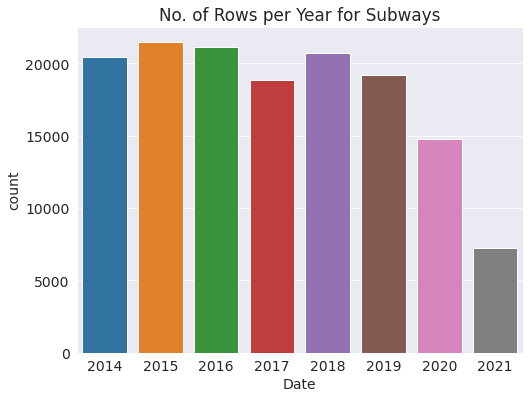

In [35]:
plt.title('No. of Rows per Year for Subways')
sns.countplot(x=pd.to_datetime(subwayDelay_df.Date).dt.year);

In [36]:
year = pd.to_datetime(subwayDelay_df.Date).dt.year

train_df = subwayDelay_df[year < 2018]
val_df = subwayDelay_df[year == 2018]
test_df = subwayDelay_df[year > 2018]

In [37]:
train_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,1,0,21
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,1,1,1,2,6
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,1,1,1,2,40
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,1,1,1,3,10
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,1,1,1,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81940,2017-12-31,23:24,Sunday,KEELE STATION,SUUT,0,0,W,BD,5245,2017,12,31,52,23,24
81941,2017-12-31,23:44,Sunday,BAY STATION,PUMEL,0,0,NaN,BD,0,2017,12,31,52,23,44
81942,2017-12-31,23:44,Sunday,WARDEN STATION,MUSC,0,0,W,BD,5225,2017,12,31,52,23,44
81943,2017-12-31,23:58,Sunday,GLENCAIRN STATION,SUUT,10,14,S,YU,5576,2017,12,31,52,23,58


In [38]:
val_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
81945,2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986,2018,1,1,1,0,29
81946,2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0,2018,1,1,1,1,7
81947,2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751,2018,1,1,1,1,22
81948,2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222,2018,1,1,1,1,28
81949,2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781,2018,1,1,1,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102677,2018-12-31,22:34,Monday,DUNDAS STATION,PUMST,0,0,NaN,YU,0,2018,12,31,1,22,34
102678,2018-12-31,22:36,Monday,DUNDAS STATION,SUDP,3,6,N,YU,5881,2018,12,31,1,22,36
102679,2018-12-31,23:08,Monday,BLOOR STATION,MUIRS,0,0,NaN,YU,0,2018,12,31,1,23,8
102680,2018-12-31,23:21,Monday,QUEEN'S PARK STATION,TUSC,0,0,S,YU,5841,2018,12,31,1,23,21


In [39]:
test_df

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
102682,2019-01-01,01:08,Tuesday,YORK MILLS STATION,PUSI,0,0,S,YU,5766,2019,1,1,1,1,8
102683,2019-01-01,02:14,Tuesday,ST ANDREW STATION,PUMST,0,0,NaN,YU,0,2019,1,1,1,2,14
102684,2019-01-01,02:16,Tuesday,JANE STATION,TUSC,0,0,W,BD,5117,2019,1,1,1,2,16
102685,2019-01-01,02:27,Tuesday,BLOOR STATION,SUO,0,0,N,YU,5436,2019,1,1,1,2,27
102686,2019-01-01,03:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061,2019,1,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143912,2021-06-30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,2021,6,30,26,1,23
143913,2021-06-30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0,2021,6,30,26,6,0
143914,2021-06-30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0,2021,6,30,26,12,40
143915,2021-06-30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171,2021,6,30,26,20,50


Looking above, the subwayDelay_df has been split into three sets: train_df, val_df, and test_df. The original subwayDelay_df has 143917 rows. Here's the split for each of the sets:

> 1. train_df - 81945 / 143917 rows (57%)
> 2. val_df - 20737 / 143917 rows (14%)
> 3. train_df - 41235 / 143917 rows (29%)

While not a perfect 60 - 20 - 20 split, we ensure the sets contain data for all 12 months of the year (except for 2021 as the data goes up to the end of June). A warning that said "A value is trying to be set on a copy of a slice from a DataFrame" is the reason why the datasets were split after the new date columns were added.





### Input and Target Columns

Let's select the columns that we'll use for training.

In [40]:
subwayDelay_df.columns

Index(['Date', 'Time', 'DayOfWeek', 'Station', 'Code', 'Min_Delay', 'Min_Gap',
       'Bound', 'Line', 'Vehicle', 'Year', 'Month', 'DayOfMonth', 'WeekOfYear',
       'Hour', 'Minute'],
      dtype='object')

In [41]:
input_cols = ['DayOfWeek', 'Station', 'Code', 'Min_Gap',
       'Bound', 'Line', 'Vehicle', 'Year', 'Month', 'DayOfMonth', 'WeekOfYear',
       'Hour', 'Minute']
target_col = 'Min_Delay'

In [42]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [43]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [44]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [45]:
train_inputs

,DayOfWeek,Station,Code,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,Wednesday,VICTORIA PARK STATION,MUPR1,60,W,BD,5111,2014,1,1,1,0,21
1,Wednesday,HIGH PARK STATION,SUDP,7,W,BD,5001,2014,1,1,1,2,6
2,Wednesday,SHEPPARD STATION,MUNCA,0,NaN,YU,0,2014,1,1,1,2,40
3,Wednesday,LANSDOWNE STATION,SUDP,8,W,BD,5116,2014,1,1,1,3,10
4,Wednesday,BLOOR STATION,MUSAN,10,S,YU,5386,2014,1,1,1,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81940,Sunday,KEELE STATION,SUUT,0,W,BD,5245,2017,12,31,52,23,24
81941,Sunday,BAY STATION,PUMEL,0,NaN,BD,0,2017,12,31,52,23,44
81942,Sunday,WARDEN STATION,MUSC,0,W,BD,5225,2017,12,31,52,23,44
81943,Sunday,GLENCAIRN STATION,SUUT,14,S,YU,5576,2017,12,31,52,23,58


In [46]:
train_targets

0        55
1         3
2         0
3         3
4         5
         ..
81940     0
81941     0
81942     0
81943    10
81944     0
Name: Min_Delay, Length: 81945, dtype: int64

Let's also identify numeric and categorical columns.

In [47]:
subwayDelay_df.columns

Index(['Date', 'Time', 'DayOfWeek', 'Station', 'Code', 'Min_Delay', 'Min_Gap',
       'Bound', 'Line', 'Vehicle', 'Year', 'Month', 'DayOfMonth', 'WeekOfYear',
       'Hour', 'Minute'],
      dtype='object')

In [48]:
numeric_cols = ['Min_Gap', 'Year', 'Month', 'DayOfMonth', 'WeekOfYear','Hour', 'Minute']
categorical_cols = ['DayOfWeek', 'Station', 'Code', 'Bound', 'Line', 'Vehicle']

In [49]:
subwayDelay_df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143917 entries, 0 to 143916
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Min_Gap     143917 non-null  int64 
 1   Year        143917 non-null  int64 
 2   Month       143917 non-null  int64 
 3   DayOfMonth  143917 non-null  int64 
 4   WeekOfYear  143917 non-null  UInt32
 5   Hour        143917 non-null  int64 
 6   Minute      143917 non-null  int64 
dtypes: UInt32(1), int64(6)
memory usage: 7.3 MB


In [50]:
subwayDelay_df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143917 entries, 0 to 143916
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DayOfWeek  143917 non-null  object
 1   Station    143917 non-null  object
 2   Code       143916 non-null  object
 3   Bound      111703 non-null  object
 4   Line       143373 non-null  object
 5   Vehicle    143917 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 6.6+ MB


"Vehicle" is an identifier for each subway train, which is why it was placed in the categorical section.

### Impute Missing Numerical Data

In [51]:
subwayDelay_df[numeric_cols].isna().sum()

Min_Gap       0
Year          0
Month         0
DayOfMonth    0
WeekOfYear    0
Hour          0
Minute        0
dtype: int64

There appears to be no missing numerical data in the dataset. Therefore, no imputation for numerical data is needed.

In [52]:
train_df[numeric_cols].isna().sum()

Min_Gap       0
Year          0
Month         0
DayOfMonth    0
WeekOfYear    0
Hour          0
Minute        0
dtype: int64

In [53]:
val_df[numeric_cols].isna().sum()

Min_Gap       0
Year          0
Month         0
DayOfMonth    0
WeekOfYear    0
Hour          0
Minute        0
dtype: int64

In [54]:
test_df[numeric_cols].isna().sum()

Min_Gap       0
Year          0
Month         0
DayOfMonth    0
WeekOfYear    0
Hour          0
Minute        0
dtype: int64

### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range. We're doing this to ensure no particular feature has a disproportionate impact on the model's loss.

In [55]:
subwayDelay_df[numeric_cols].describe()

,Min_Gap,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
count,143917.000000,143917.000000,143917.000000,143917.000000,143917.000000,143917.000000,143917.000000
mean,3.254668,2017.049119,6.352502,15.770194,25.913075,13.026564,28.705337
std,9.117866,2.103663,3.459182,8.802187,15.116904,6.199885,17.795562
min,0.000000,2014.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,2015.000000,3.000000,8.000000,13.000000,8.000000,13.000000
50%,0.000000,2017.000000,6.000000,16.000000,25.000000,13.000000,29.000000
75%,6.000000,2019.000000,9.000000,23.000000,39.000000,18.000000,44.000000
max,999.000000,2021.000000,12.000000,31.000000,53.000000,23.000000,59.000000


In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [58]:
scaler.fit(subwayDelay_df[numeric_cols])

MinMaxScaler()

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [59]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range (0, 1).

In [60]:
train_inputs[numeric_cols].describe()

,Min_Gap,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
count,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000
mean,0.002724,0.209989,0.504935,0.490218,0.496015,0.568807,0.488367
std,0.008567,0.157046,0.314829,0.292709,0.290762,0.267678,0.300071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.142857,0.272727,0.233333,0.230769,0.347826,0.237288
50%,0.000000,0.142857,0.545455,0.500000,0.500000,0.608696,0.508475
75%,0.005005,0.285714,0.818182,0.733333,0.750000,0.782609,0.745763
max,1.000000,0.428571,1.000000,1.000000,1.000000,1.000000,1.000000


### Encode Categorical Columns

Let's encode categorical columns.

In [61]:
subwayDelay_df[categorical_cols].nunique()

DayOfWeek       7
Station       731
Code          219
Bound           9
Line           71
Vehicle      1227
dtype: int64

There are lots of unique categories, and this may end up becoming a problem when one hot encoding. For this reason, the categorical columns are ordinal encoded instead of one hot encoding. We're using ordinal over label encoding because the scikit learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) describes using label encoding for target variables and ordinal encoding for features.

One hot encoding for all categories was attempted, but the encoder simply could not transform all the large number of values, possibly due to far too many columns being created and/or running into problems with dimensionality. A mix of one hot encoding and ordinal encoding was also attempted, but ran into an issue with a mismatch of the number of columns when trying to transform the encoder and combining the datasets. A possible future revision is manipulating the dataframe columns to see if a mix of the two encoding types can be used.

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

In [64]:
encoder.fit(train_inputs[categorical_cols])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan)

In [65]:
encoded_cols = list(categorical_cols)

In [66]:
encoded_cols

['DayOfWeek', 'Station', 'Code', 'Bound', 'Line', 'Vehicle']

In [67]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [68]:
train_inputs

,DayOfWeek,Station,Code,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,6.0,274.0,93.0,0.060060,5.0,27.0,246.0,0.000000,0.0,0.0,0.000000,0.000000,0.355932
1,6.0,116.0,165.0,0.007007,5.0,27.0,136.0,0.000000,0.0,0.0,0.000000,0.086957,0.101695
2,6.0,222.0,85.0,0.000000,NaN,36.0,0.0,0.000000,0.0,0.0,0.000000,0.086957,0.677966
3,6.0,165.0,165.0,0.008008,5.0,27.0,251.0,0.000000,0.0,0.0,0.000000,0.130435,0.169492
4,6.0,13.0,94.0,0.010010,4.0,36.0,512.0,0.000000,0.0,0.0,0.000000,0.130435,0.338983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81940,3.0,131.0,173.0,0.000000,5.0,27.0,380.0,0.428571,1.0,1.0,0.980769,1.000000,0.406780
81941,3.0,5.0,113.0,0.000000,NaN,27.0,0.0,0.428571,1.0,1.0,0.980769,1.000000,0.745763
81942,3.0,276.0,95.0,0.000000,5.0,27.0,360.0,0.428571,1.0,1.0,0.980769,1.000000,0.745763
81943,3.0,106.0,173.0,0.014014,4.0,36.0,610.0,0.428571,1.0,1.0,0.980769,1.000000,0.983051


In [69]:
val_inputs

,DayOfWeek,Station,Code,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
81945,1.0,229.0,70.0,0.015015,2.0,36.0,806.0,0.571429,0.0,0.0,0.0,0.000000,0.491525
81946,1.0,63.0,85.0,0.000000,NaN,36.0,0.0,0.571429,0.0,0.0,0.0,0.043478,0.118644
81947,1.0,187.0,95.0,0.000000,2.0,36.0,685.0,0.571429,0.0,0.0,0.0,0.043478,0.372881
81948,1.0,NaN,40.0,0.000000,NaN,27.0,357.0,0.571429,0.0,0.0,0.0,0.043478,0.474576
81949,1.0,187.0,87.0,0.011011,4.0,36.0,700.0,0.571429,0.0,0.0,0.0,0.043478,0.661017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102677,1.0,63.0,115.0,0.000000,NaN,36.0,0.0,0.571429,1.0,1.0,0.0,0.956522,0.576271
102678,1.0,63.0,165.0,0.006006,2.0,36.0,754.0,0.571429,1.0,1.0,0.0,0.956522,0.610169
102679,1.0,13.0,83.0,0.000000,NaN,36.0,0.0,0.571429,1.0,1.0,0.0,1.000000,0.135593
102680,1.0,206.0,195.0,0.000000,4.0,36.0,732.0,0.571429,1.0,1.0,0.0,1.000000,0.355932


In [70]:
test_inputs

,DayOfWeek,Station,Code,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
102682,5.0,323.0,120.0,0.000000,4.0,36.0,694.0,0.714286,0.000000,0.000000,0.000000,0.043478,0.135593
102683,5.0,237.0,115.0,0.000000,NaN,36.0,0.0,0.714286,0.000000,0.000000,0.000000,0.086957,0.237288
102684,5.0,127.0,195.0,0.000000,5.0,27.0,252.0,0.714286,0.000000,0.000000,0.000000,0.086957,0.271186
102685,5.0,13.0,168.0,0.000000,2.0,36.0,532.0,0.714286,0.000000,0.000000,0.000000,0.086957,0.457627
102686,5.0,73.0,70.0,0.016016,2.0,36.0,834.0,0.714286,0.000000,0.000000,0.000000,0.130435,0.050847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143912,6.0,239.0,84.0,0.000000,NaN,36.0,0.0,1.000000,0.454545,0.966667,0.480769,0.043478,0.389831
143913,6.0,256.0,87.0,0.000000,NaN,34.0,0.0,1.000000,0.454545,0.966667,0.480769,0.260870,0.000000
143914,6.0,172.0,84.0,0.000000,NaN,34.0,0.0,1.000000,0.454545,0.966667,0.480769,0.521739,0.677966
143915,6.0,172.0,96.0,0.014014,1.0,34.0,868.0,1.000000,0.454545,0.966667,0.480769,0.869565,0.847458


### Filling NaNs with 0s

There are some NaN values left in the categorical columns, and they will be replaced with 0. The NaNs are being filled with 0s after encoding because of this error: "TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']".

In [71]:
train_inputs.isna().sum()

DayOfWeek         0
Station           0
Code              1
Min_Gap           0
Bound         17532
Line            318
Vehicle           0
Year              0
Month             0
DayOfMonth        0
WeekOfYear        0
Hour              0
Minute            0
dtype: int64

In [72]:
train_inputs = train_inputs.fillna(0)
val_inputs = val_inputs.fillna(0)
test_inputs = test_inputs.fillna(0)

In [73]:
train_inputs

,DayOfWeek,Station,Code,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,6.0,274.0,93.0,0.060060,5.0,27.0,246.0,0.000000,0.0,0.0,0.000000,0.000000,0.355932
1,6.0,116.0,165.0,0.007007,5.0,27.0,136.0,0.000000,0.0,0.0,0.000000,0.086957,0.101695
2,6.0,222.0,85.0,0.000000,0.0,36.0,0.0,0.000000,0.0,0.0,0.000000,0.086957,0.677966
3,6.0,165.0,165.0,0.008008,5.0,27.0,251.0,0.000000,0.0,0.0,0.000000,0.130435,0.169492
4,6.0,13.0,94.0,0.010010,4.0,36.0,512.0,0.000000,0.0,0.0,0.000000,0.130435,0.338983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81940,3.0,131.0,173.0,0.000000,5.0,27.0,380.0,0.428571,1.0,1.0,0.980769,1.000000,0.406780
81941,3.0,5.0,113.0,0.000000,0.0,27.0,0.0,0.428571,1.0,1.0,0.980769,1.000000,0.745763
81942,3.0,276.0,95.0,0.000000,5.0,27.0,360.0,0.428571,1.0,1.0,0.980769,1.000000,0.745763
81943,3.0,106.0,173.0,0.014014,4.0,36.0,610.0,0.428571,1.0,1.0,0.980769,1.000000,0.983051


In [74]:
train_inputs[categorical_cols].isna().values.sum()

0

In [75]:
val_inputs[categorical_cols].isna().values.sum()

0

In [76]:
test_inputs[categorical_cols].isna().values.sum()

0

## Training Decision Trees

A decision tree in general represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training

We can use `DecisionTreeRegressor` from `sklearn.tree` to train a decision tree.

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
decisionTreeModel = DecisionTreeRegressor(random_state=42)

In [79]:
%%time
decisionTreeModel.fit(train_inputs, train_targets)

CPU times: user 422 ms, sys: 339 µs, total: 422 ms
Wall time: 421 ms


DecisionTreeRegressor(random_state=42)

### Evaluation

Let's evaluate the accuracy of the decision tree.

In [80]:
decisionTreeModel.score(train_inputs, train_targets)

1.0

Concerningly, the training set has a full score of 100% accuracy, which may imply a higher error for overfitting in the validation set.

In [81]:
decisionTreeModel.score(val_inputs, val_targets)

0.711404711660486

As expected, the model using the validation set has lower accuracy, with a score of 71%. This is likely due to the model memorizing specific trends in the training set.

In [121]:
from sklearn.metrics import mean_squared_error

def rmse(targets, predictions):
    return mean_squared_error(targets, predictions, squared=False)

Also, we can calculate the RMSE for the decision tree.

In [122]:
decisionTreeModel_train_preds = decisionTreeModel.predict(train_inputs)

In [123]:
rmse(train_targets, decisionTreeModel_train_preds)

0.0

In [124]:
decisionTreeModel_val_preds = decisionTreeModel.predict(val_inputs)

In [125]:
rmse(val_targets, decisionTreeModel_val_preds)

4.557192033306504

The RMSE (Root Mean Square Error) for the training set is 0 minutes (hence the perfect score), and 4.6 minutes for the validation set.

### Visualization

We can visualize the decision tree learned from the training data.

In [94]:
from sklearn.tree import plot_tree, export_text

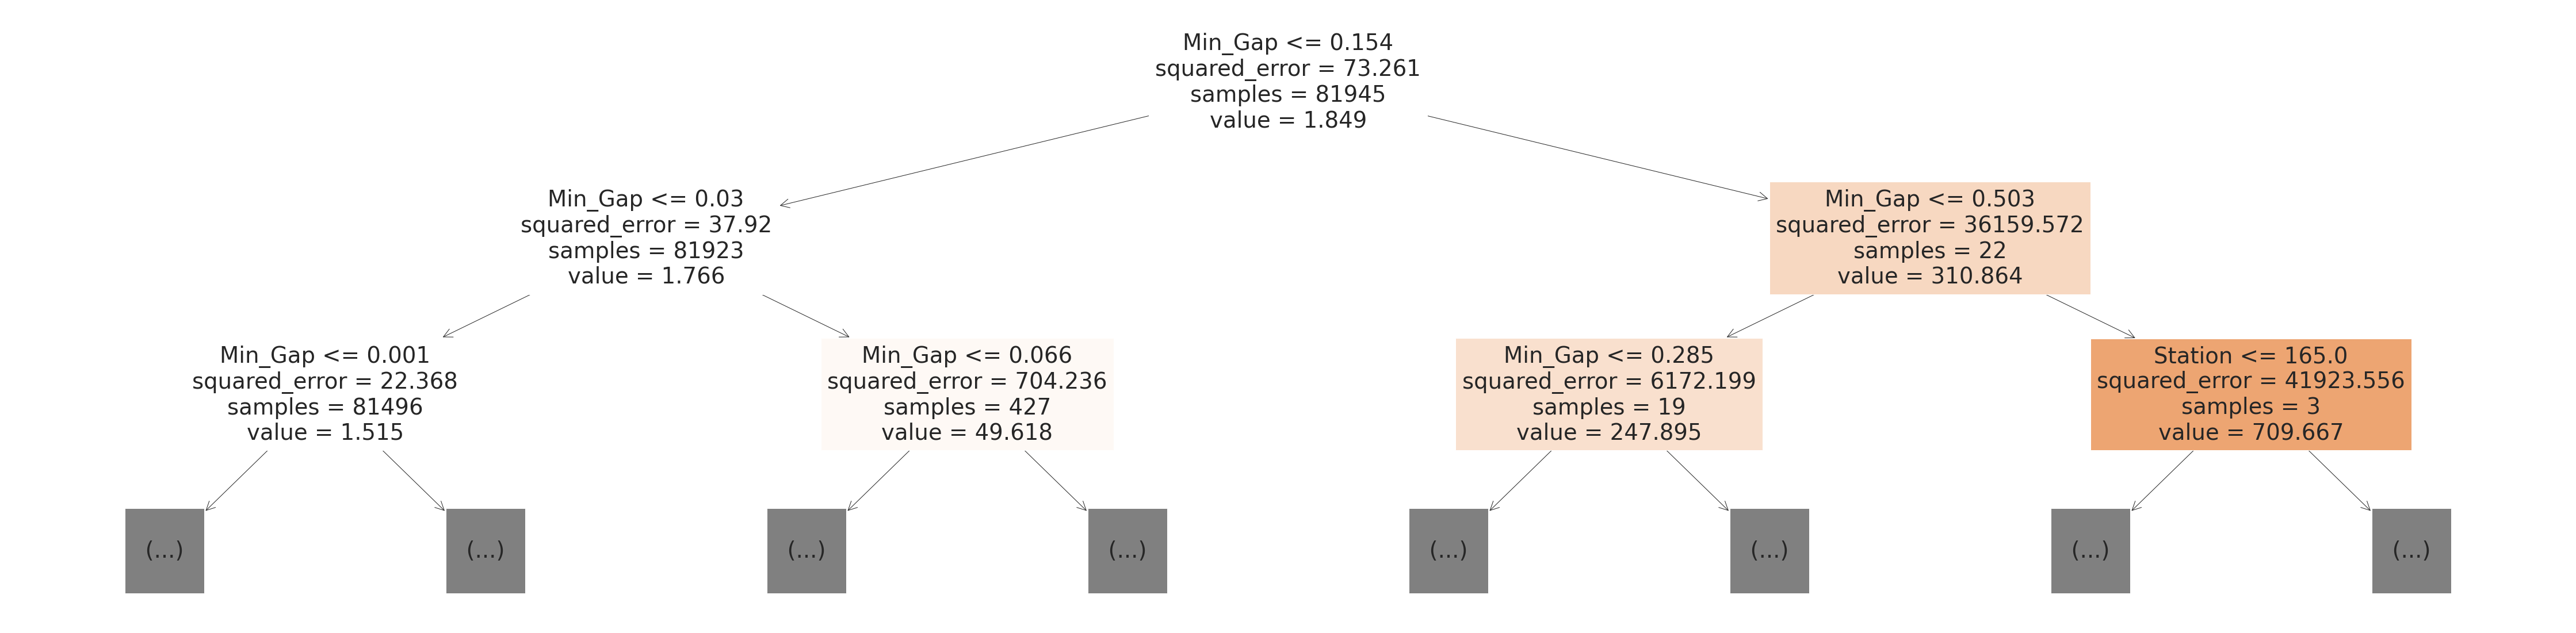

In [95]:
plt.figure(figsize=(80,20))
plot_tree(decisionTreeModel, feature_names=train_inputs.columns, max_depth=2, filled=True);

The "Min_Gap" is the biggest decision factor, which makes sense because if there is no delay time (ie. Delay time = 0 mins), there would be no gap time (ie. the time between the next train is 0 minutes because there was no delay). 

In [96]:
decisionTreeModel.tree_.max_depth

32

We can also display the tree as text, which can be easier to follow for deeper trees.

In [97]:
tree_text = export_text(decisionTreeModel, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:4000])

|--- Min_Gap <= 0.15
|   |--- Min_Gap <= 0.03
|   |   |--- Min_Gap <= 0.00
|   |   |   |--- Hour <= 0.28
|   |   |   |   |--- Minute <= 0.99
|   |   |   |   |   |--- Hour <= 0.20
|   |   |   |   |   |   |--- DayOfMonth <= 0.98
|   |   |   |   |   |   |   |--- Hour <= 0.02
|   |   |   |   |   |   |   |   |--- Month <= 0.14
|   |   |   |   |   |   |   |   |   |--- WeekOfYear <= 0.14
|   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |   |--- WeekOfYear >  0.14
|   |   |   |   |   |   |   |   |   |   |--- DayOfWeek <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- DayOfWeek >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- Month >  0.14
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- Hour >  0.02
|   |   |   |   |   |   |   |   |--- Vehicle <= 214.50
|   |   |   |   |   |   

### Feature Importance

Based on the computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [98]:
decisionTreeModel.feature_importances_

array([2.06400732e-02, 3.74496207e-02, 4.28086771e-02, 7.91587945e-01,
       1.74741172e-03, 6.81921785e-03, 2.72035074e-03, 1.68758824e-03,
       8.70816560e-04, 6.71921838e-04, 8.35556150e-02, 6.42199393e-03,
       3.01876847e-03])

Let's turn this into a dataframe and visualize the most important features.

In [99]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': decisionTreeModel.feature_importances_
}).sort_values('importance', ascending=False)

In [100]:
importance_df.head(10)

,feature,importance
3,Min_Gap,0.791588
10,WeekOfYear,0.083556
2,Code,0.042809
1,Station,0.037450
0,DayOfWeek,0.020640
5,Line,0.006819
11,Hour,0.006422
12,Minute,0.003019
6,Vehicle,0.002720
4,Bound,0.001747


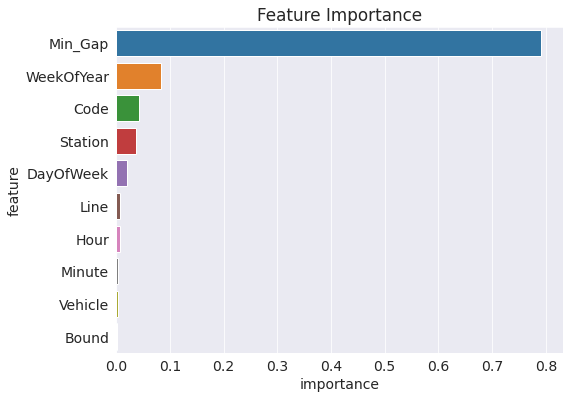

In [101]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

After "Min_Gap", the most important features are the week of the year when delays may occur, along with the delay code (which is the reason for the possible delay), and the subway station.

### Hyperparameter Tuning

Let us now tune the hyperparameters of our model. To do this, we can use functions and visualizations to calculate the RMSE, or the amount of error, when each hyperparameter changes.

<img src="https://i.imgur.com/EJCrSZw.png" width="480" align="center">

In [102]:
?DecisionTreeRegressor

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [104]:
def test_params_decisionTree(**params):
    model = DecisionTreeRegressor(random_state=42, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

Let's also define a helper function to test and plot different values of a single parameter.

In [105]:
def test_param_and_plot_decisionTree(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_decisionTree(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting Curve - Decision Tree: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

The graphs are used to look for the lowest number on the red line - the validation line.

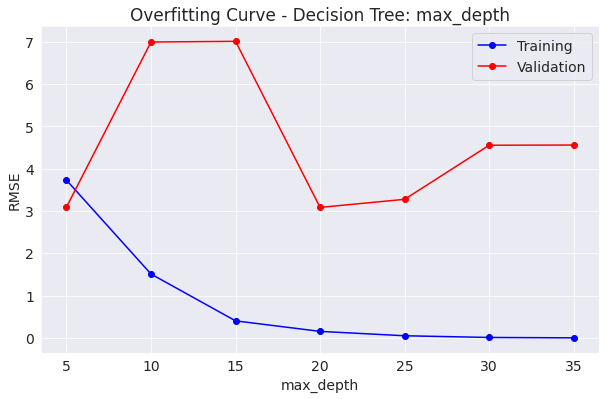

In [106]:
test_param_and_plot_decisionTree('max_depth', [5, 10, 15, 20, 25, 30, 35])

> Best max_depth = 5

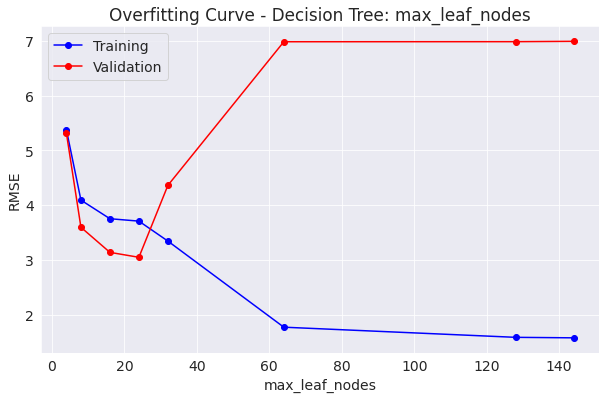

In [107]:
test_param_and_plot_decisionTree('max_leaf_nodes', [4, 8, 16, 24, 32, 64, 128, 144])

> Best max_leaf_nodes = 24

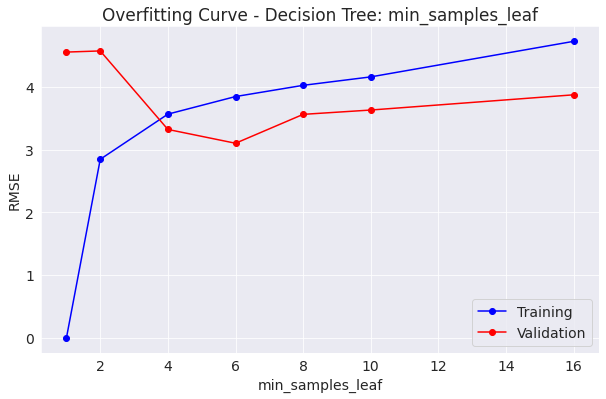

In [108]:
test_param_and_plot_decisionTree('min_samples_leaf', [1, 2, 4, 6, 8, 10, 16])

> Best min_samples_leaf = 6

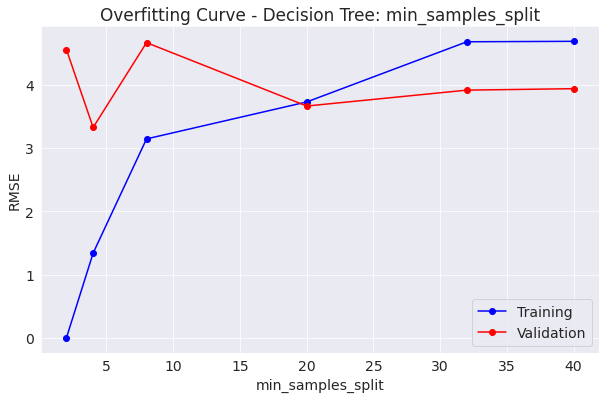

In [109]:
test_param_and_plot_decisionTree('min_samples_split', [2, 4, 8, 20, 32, 40])

> Best min_samples_split = 4

### Putting it Together

Let's train a new decision tree with customized hyperparameters based on our learnings.

In [111]:
decisionTreeModel2 = DecisionTreeRegressor(random_state = 42,
                                           max_depth = 5, 
                                           max_leaf_nodes = 24, 
                                           min_samples_leaf = 6, 
                                           min_samples_split = 4)

In [112]:
decisionTreeModel2.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=24, min_samples_leaf=6,
                      min_samples_split=4, random_state=42)

In [113]:
decisionTreeModel2.score(train_inputs, train_targets)

0.7605301435029819

In [114]:
decisionTreeModel2.score(val_inputs, val_targets) 

0.8664651778245605

Look at that boost! Previously, the model scored 100% on the training set and 71% on the validation set. While the training set did worse at 76%, the new hypertuned model did much better at 86% accuracy for the validation set.

In [115]:
decisionTreeModel2.score(test_inputs, test_targets)

0.9156359581471761

There was no test set score before optimizing some of the hyperparameters, but the test score is 91%! This is the power of hypertuning!

## Training Random Forests

Now the exact same process is going to happen, but this time with the `RandomForestRegressor`.

A random forest tree model combines the results of several decision trees trained with slightly different parameters. 
This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging.

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
randomForestModel = RandomForestRegressor(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [118]:
randomForestModel.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [119]:
randomForestModel.score(train_inputs, train_targets)

0.9639724854916123

In [120]:
randomForestModel.score(val_inputs, val_targets)

0.8605903223454899

A score of 86% for validation! The non-hypertuned random forest did much better than the non-hypertuned decision tree model (at 71%), and almost exactly as well as the hypertuned decision tree model (which did 86.6% on the hypertuned version for the validation set).

Also, we can calculate the RMSE for the random forest.

In [121]:
randomForestModel_train_preds = randomForestModel.predict(train_inputs)

In [122]:
rmse(train_targets, randomForestModel_train_preds)

1.6246256130110854

In [123]:
randomForestModel_val_preds = randomForestModel.predict(val_inputs)

In [124]:
rmse(val_targets, randomForestModel_val_preds)

3.1673727264002656

The RMSE (Root Mean Square Error), or room for error, for the training set is about 1.6 minutes, and 3.2 minutes for the validation set.

### Visualization

We can visualize the random forest learned from the training data.

We can can access individual decision trees using `randomForestModel.estimators_`

In [125]:
randomForestModel.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1608637542)

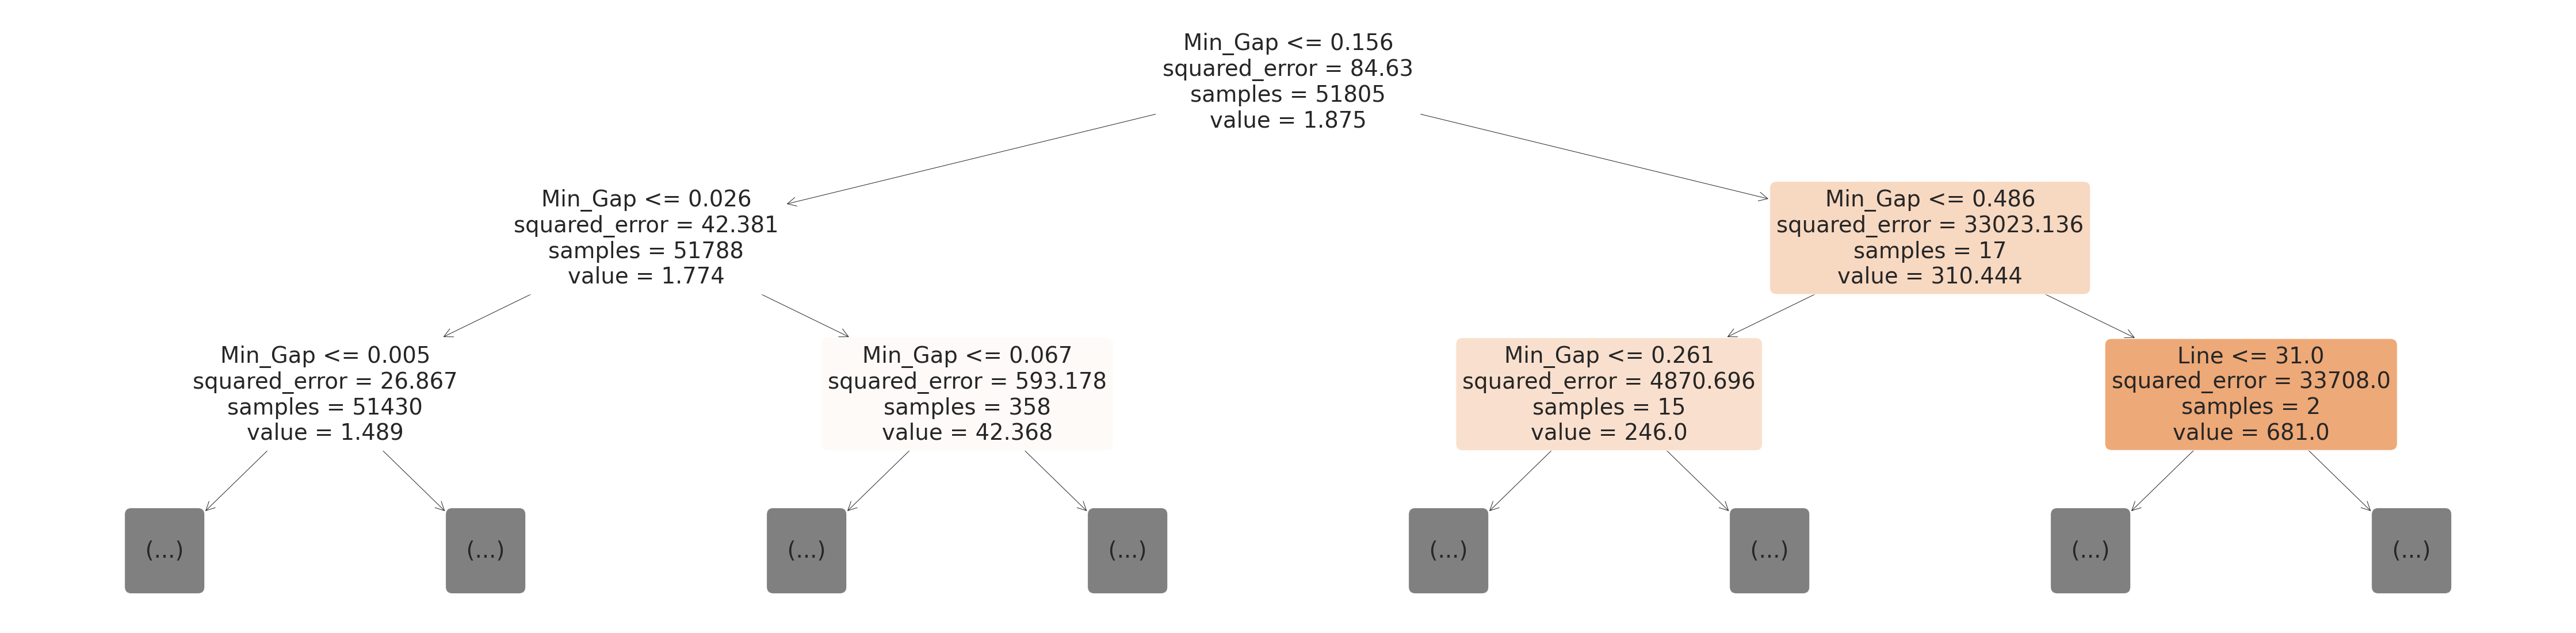

In [126]:
plt.figure(figsize=(80,20))
plot_tree(randomForestModel.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True);

In [127]:
randomForestModel.feature_importances_

array([0.03103047, 0.01383171, 0.03398491, 0.80184042, 0.00476894,
       0.00329784, 0.02556339, 0.00956478, 0.00807314, 0.01779923,
       0.01887274, 0.01168474, 0.01968768])

In [128]:
importance_df2 = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': randomForestModel.feature_importances_
}).sort_values('importance', ascending=False)

In [129]:
importance_df2.head(10)

,feature,importance
3,Min_Gap,0.801840
2,Code,0.033985
0,DayOfWeek,0.031030
6,Vehicle,0.025563
12,Minute,0.019688
10,WeekOfYear,0.018873
9,DayOfMonth,0.017799
1,Station,0.013832
11,Hour,0.011685
7,Year,0.009565


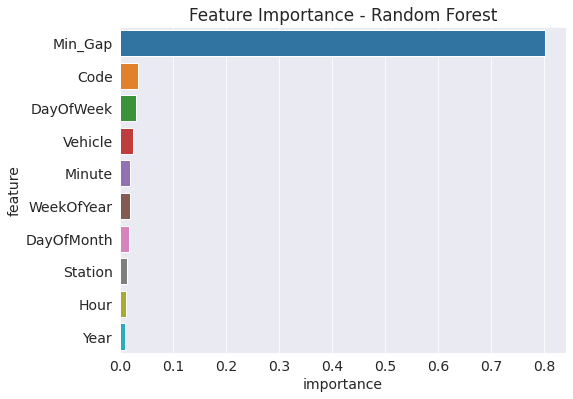

In [130]:
plt.title('Feature Importance - Random Forest')
sns.barplot(data=importance_df2.head(10), x='importance', y='feature');

Like before, "Min_Gap" is the most important feature. Although, previously it was "DayOfWeek" that was second most important, whereas for the Random Forest the second most important feature is the "Code". The "Code" is the subway delay code and the reason for why the subway was possibly delayed.

### Hyperparameter Tuning

In [131]:
def test_params_randomForest(**params):
    model = RandomForestRegressor(random_state=42, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return ("Train_RMSE: ", train_rmse), ("Val_RMSE: ", val_rmse)

In [132]:
?RandomForestRegressor

Visualizing the random tree to find the RMSE takes quite a bit of time, so instead only the test_params() function will be used.

In [133]:
test_params_randomForest(min_samples_leaf=1)

(('Train_RMSE: ', 1.6246256130110854), ('Val_RMSE: ', 3.1673727264002656))

In [134]:
test_params_randomForest(min_samples_leaf=2)

(('Train_RMSE: ', 2.8846383912740707), ('Val_RMSE: ', 3.156096557387569))

In [135]:
test_params_randomForest(min_samples_leaf=4)

(('Train_RMSE: ', 3.649436258257819), ('Val_RMSE: ', 3.061416711636459))

In [136]:
test_params_randomForest(min_samples_leaf=8)

(('Train_RMSE: ', 4.187208797075155), ('Val_RMSE: ', 3.363622965824515))

In [137]:
test_params_randomForest(min_samples_leaf=10)

(('Train_RMSE: ', 4.406531777221763), ('Val_RMSE: ', 3.4865133449224244))

> Best min_samples_leaf = 4

In [138]:
test_params_randomForest(n_estimators=10)

(('Train_RMSE: ', 1.8284835926142), ('Val_RMSE: ', 3.2784962096856805))

In [139]:
test_params_randomForest(n_estimators=20)

(('Train_RMSE: ', 1.7131390707189809), ('Val_RMSE: ', 3.247704888453452))

In [140]:
test_params_randomForest(n_estimators=40)

(('Train_RMSE: ', 1.6326195547436806), ('Val_RMSE: ', 3.216407300993031))

In [141]:
test_params_randomForest(n_estimators=80)

(('Train_RMSE: ', 1.6419254129118304), ('Val_RMSE: ', 3.159168456546364))

In [142]:
test_params_randomForest(n_estimators=100)

(('Train_RMSE: ', 1.6246256130110854), ('Val_RMSE: ', 3.1673727264002656))

> Best n_estimators = 80

In [147]:
test_params_randomForest(max_features=2)

(('Train_RMSE: ', 1.9544887690033808), ('Val_RMSE: ', 4.48230539919607))

In [148]:
test_params_randomForest(max_features=3)

(('Train_RMSE: ', 1.8424628560165985), ('Val_RMSE: ', 3.8719193868973347))

In [149]:
test_params_randomForest(max_features=6)

(('Train_RMSE: ', 1.6616695608491725), ('Val_RMSE: ', 3.1651528378356764))

In [150]:
test_params_randomForest(max_features=8)

(('Train_RMSE: ', 1.6305588972521106), ('Val_RMSE: ', 3.208497866913837))

> Best max_features = 6

In [152]:
test_params_randomForest(max_depth=3)

(('Train_RMSE: ', 3.8843687431083307), ('Val_RMSE: ', 3.2047459481287563))

In [153]:
test_params_randomForest(max_depth=4)

(('Train_RMSE: ', 3.7832686849415738), ('Val_RMSE: ', 3.0433302161144398))

In [154]:
test_params_randomForest(max_depth=5)

(('Train_RMSE: ', 3.733039947550095), ('Val_RMSE: ', 2.9764794385935143))

In [155]:
test_params_randomForest(max_depth=10)

(('Train_RMSE: ', 1.988525088259039), ('Val_RMSE: ', 3.232296594652979))

In [156]:
test_params_randomForest(max_depth=15)

(('Train_RMSE: ', 1.6815455189266646), ('Val_RMSE: ', 3.146967972513224))

> Best max_depth = 5

In [157]:
test_params_randomForest(min_impurity_decrease=1e-7)

(('Train_RMSE: ', 1.642717239855828), ('Val_RMSE: ', 3.16913189621631))

In [158]:
test_params_randomForest(min_impurity_decrease=1e-4)

(('Train_RMSE: ', 1.6435640588811289), ('Val_RMSE: ', 3.2182106405926496))

In [159]:
test_params_randomForest(min_impurity_decrease=1e-3)

(('Train_RMSE: ', 1.9547416173907197), ('Val_RMSE: ', 3.1833678718623815))

In [160]:
test_params_randomForest(min_impurity_decrease=1e-2)

(('Train_RMSE: ', 2.7293421589758005), ('Val_RMSE: ', 3.1849456486447436))

> Best min_impurity_decrease = 1e-7

### Putting it Together

Let's train a new random forest with customized hyperparameters based on our learnings.

In [162]:
randomForestModel2 = RandomForestRegressor(n_jobs=-1, 
                                           random_state=42, 
                                           n_estimators=80,
                                           max_features=6,
                                           max_depth=5,
                                           min_impurity_decrease=1e-7, 
                                           min_samples_leaf=4)

In [163]:
randomForestModel2.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=5, max_features=6, min_impurity_decrease=1e-07,
                      min_samples_leaf=4, n_estimators=80, n_jobs=-1,
                      random_state=42)

In [164]:
randomForestModel2.score(train_inputs, train_targets)

0.716710950052742

In [165]:
randomForestModel2.score(val_inputs, val_targets)

0.8055358080403087

A drop in the model scores! Surprisingly, the random forest model did worse after hypertuning, with a score of 80% for validation versus 86% previously.

In [166]:
randomForestModel2.score(test_inputs, test_targets)

0.8808175460645966

There was no test set score before optimizing some of the hyperparameters, but the test score is 88%! This score is lower than the optimized decision tree model with a test score of 91%. The random forest model could be scoring lower due to poor hyperparameter tuning. Another reason is because the decision tree can do well because of the higher importance for the single feature, "Min_Gap", and the random forest may be doing extra work that may be unnecessary. 

Using the test_param_and_plot_randomForest() function for each hyperparameter took some time, and the outputs are not necessarily the "best possible" results, but rather the best result that was found. This means, there could be more hyperparameter tuning that could be done to improve the random forest score.

## Gradient Boosting

Now we're going to do the exact same thing, but this time with gradient boosting.

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)



### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [167]:
from xgboost import XGBRegressor

In [168]:
?XGBRegressor

In [169]:
gradientBoostModel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's train the model using `model.fit`.

In [170]:
gradientBoostModel.fit(train_inputs, train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
gradientBoostModel.score(train_inputs, train_targets)

0.8154950198614251

In [172]:
gradientBoostModel.score(val_inputs, val_targets)

0.8748965713997303

A score of 87% for validation! The non-hypertuned gradient boosting model a bit better than the non-hypertuned random forest model (at 86%), and better than the hypertuned decision tree model (which did 86.6% on the hypertuned version for the validation set).

Also, we can calculate the RMSE for the gradient boosted model.

In [173]:
gradientBoostModel_train_preds = gradientBoostModel.predict(train_inputs)

In [174]:
rmse(train_targets, gradientBoostModel_train_preds)

3.6765475861371404

In [175]:
gradientBoostModel_val_preds = gradientBoostModel.predict(val_inputs)

In [176]:
rmse(val_targets, gradientBoostModel_val_preds)

3.000456379291761

The RMSE (Root Mean Square Error), or room for error, for the training set is about 3.6 minutes, and 3.0 minutes for the validation set.

### Visualization

In [177]:
gradientBoostModel.feature_importances_

array([1.71344876e-02, 1.72107294e-02, 4.51747002e-03, 9.21337724e-01,
       1.33796863e-03, 0.00000000e+00, 1.04590785e-02, 6.44053682e-04,
       0.00000000e+00, 1.51879084e-03, 1.61928285e-04, 1.48688965e-02,
       1.08088600e-02], dtype=float32)

In [178]:
importance_df3 = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gradientBoostModel.feature_importances_
}).sort_values('importance', ascending=False)

In [179]:
importance_df3.head(10)

,feature,importance
3,Min_Gap,0.921338
1,Station,0.017211
0,DayOfWeek,0.017134
11,Hour,0.014869
12,Minute,0.010809
6,Vehicle,0.010459
2,Code,0.004517
9,DayOfMonth,0.001519
4,Bound,0.001338
7,Year,0.000644


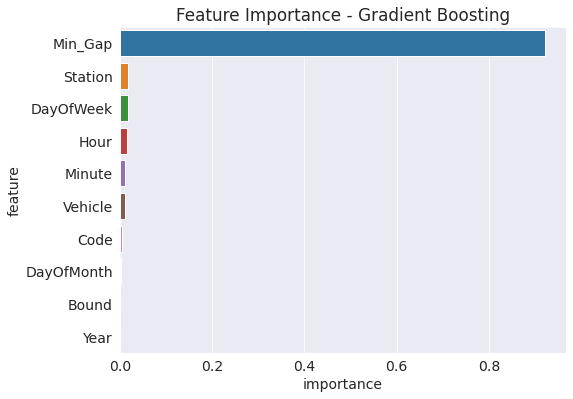

In [180]:
plt.title('Feature Importance - Gradient Boosting')
sns.barplot(data=importance_df3.head(10), x='importance', y='feature');

Like before, "Min_Gap" is the most important feature. Although, previously it was "Code" that was second most important for the Random Forest, whereas for the Gradient Boosting model the second most important features are the "Station" and "DayOfWeek".

### Hyperparameter Tuning

In [181]:
def test_params_gradientBoost(**params):
    model = XGBRegressor(random_state=42, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return ("Train_RMSE: ", train_rmse), ("Val_RMSE: ", val_rmse)

In [182]:
def test_param_and_plot_gradientBoost(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_gradientBoost(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting Curve - Gradient Boost: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

For gradient boosting, the test_param_and_plot() function will be skipped as the output takes a long time. Instead, the RMSE will be measured using the regular test_param() function.

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.


In [183]:
test_params_gradientBoost(n_estimators=4)

(('Train_RMSE: ', 4.457241516934184), ('Val_RMSE: ', 3.571693652479347))

In [184]:
test_params_gradientBoost(n_estimators=10)

(('Train_RMSE: ', 3.6706575106232435), ('Val_RMSE: ', 2.9510109876611907))

In [185]:
test_params_gradientBoost(n_estimators=30)

(('Train_RMSE: ', 2.5584036365172915), ('Val_RMSE: ', 3.5213636625284797))

In [186]:
test_params_gradientBoost(n_estimators=50)

(('Train_RMSE: ', 1.5656270897353188), ('Val_RMSE: ', 3.8993434646959173))

> Best n_estimators = 10

#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [187]:
test_params_gradientBoost(max_depth=2)

(('Train_RMSE: ', 3.6562480951617045), ('Val_RMSE: ', 3.0007651880711315))

In [188]:
test_params_gradientBoost(max_depth=5)

(('Train_RMSE: ', 1.3144868387650632), ('Val_RMSE: ', 4.267813403248776))

In [189]:
test_params_gradientBoost(max_depth=10)

(('Train_RMSE: ', 0.18664172384535435), ('Val_RMSE: ', 5.95157660408611))

> Best max_depth = 2

#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [191]:
test_params_gradientBoost(n_estimators=10, learning_rate=0.1)

(('Train_RMSE: ', 4.869607616002964), ('Val_RMSE: ', 4.190780382851117))

In [192]:
test_params_gradientBoost(n_estimators=10, learning_rate=0.3)

(('Train_RMSE: ', 3.6706575106232435), ('Val_RMSE: ', 2.9510109876611907))

In [193]:
test_params_gradientBoost(n_estimators=10, learning_rate=0.9)

(('Train_RMSE: ', 2.3390987303853437), ('Val_RMSE: ', 5.383070220334126))

In [194]:
test_params_gradientBoost(n_estimators=10, learning_rate=0.99)

(('Train_RMSE: ', 1.8001761074803482), ('Val_RMSE: ', 3.2793865618591873))

> Best learning_rate = 0.3

### Putting it Together

Let's train a final model on the entire training set with custom hyperparameters. 

In [195]:
gradientBoostModel2 = XGBRegressor(n_jobs=-1, 
                                   random_state=42, 
                                   n_estimators=10,
                                   learning_rate=0.3, 
                                   max_depth=2)

In [196]:
%%time
gradientBoostModel2.fit(train_inputs, train_targets)

CPU times: user 1.82 s, sys: 6.2 ms, total: 1.82 s
Wall time: 906 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [197]:
gradientBoostModel2.score(train_inputs, train_targets) 

0.7948363667223081

In [198]:
gradientBoostModel2.score(val_inputs, val_targets)

0.8581944709019736

85.8% for gradient boosting on the validation set! The gradient boosted model did better than the random forest model at 80% for validation, but slightly worse than the decision tree at 86.6%.

In [199]:
gradientBoostModel2.score(test_inputs, test_targets)

0.9267859380655391

The test score is 92.6%! This score is even better than the best score from the decision tree model at 91%, and the random forest model at 88%. Take note, less hyperparameters were tuned in the gradient boosted model than the random forest model, which may have impacted the random forest model score to be lower.

## Making Predictions on New Inputs

Let's use the best gradient boosting model to predict the subway delay time for a new input. The original Kaggle dataset used information between Jan. 2014 to June 2021. There are three more months of data from the [original subway delay data source](https://open.toronto.ca/dataset/ttc-subway-delay-data/) not included in the Kaggle dataset, so we will use the July 2021 data.

In [200]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 6.6 MB/s eta 0:00:01


In [202]:
sample_df = pd.read_excel('./subway-srt-logs-july-2021.xlsx')

In [203]:
sample_df2 = sample_df.head(1)

In [204]:
sample_df2

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2021-07-01,06:02,Thursday,MCCOWAN STATION,TRNIP,6,12,S,SRT,3004


In [205]:
sample_df2 = sample_df2.rename(columns={'Min Delay': 'Min_Delay', 'Min Gap': 'Min_Gap', 'Day': 'DayOfWeek'})

In [206]:
split_date(sample_df2)

In [207]:
sample_df2[['Hour', 'Minute']] = sample_df2['Time'].str.split(":", expand=True)

In [208]:
sample_df2["Hour"] = pd.to_numeric(sample_df2["Hour"])
sample_df2["Minute"] = pd.to_numeric(sample_df2["Minute"])

In [209]:
sample_df2[numeric_cols] = scaler.transform(sample_df2[numeric_cols])

In [210]:
encoder2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
encoder2.fit(sample_df2[categorical_cols])
encoded_cols2 = list(categorical_cols)
sample_df2[encoded_cols2] = encoder2.transform(sample_df2[categorical_cols])

In [211]:
sample_df2.fillna(0)

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,2021-07-01,06:02,0.0,0.0,0.0,6,0.012012,0.0,0.0,0.0,1.0,0.545455,0.0,0.480769,0.26087,0.033898


In [212]:
sample_df2 = sample_df2.drop(columns=['Date', 'Time', 'Min_Delay'])

In [213]:
sample_df2

,DayOfWeek,Station,Code,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,0.0,0.0,0.0,0.012012,0.0,0.0,0.0,1.0,0.545455,0.0,0.480769,0.26087,0.033898


In [214]:
predicted_delay_time = gradientBoostModel2.predict(sample_df2)
predicted_delay_time

array([5.7137547], dtype=float32)

In [215]:
print('The predicted delay time is {} minutes'.format(predicted_delay_time))

The predicted delay time is [5.7137547] minutes


In [216]:
sample_df.head(1)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2021-07-01,06:02,Thursday,MCCOWAN STATION,TRNIP,6,12,S,SRT,3004


As we can see from the original untouched sample input, the "Min Delay" time is 6 minutes. The hypertuned gradient boosted model predicted a subway delay time of 5.7 minutes, which is extremely close to the actual time.

## Saving the Models

In [217]:
import joblib

In [218]:
subway_delay_dt = {
    'model': decisionTreeModel2,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [219]:
subway_delay_rf = {
    'model': randomForestModel2,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [220]:
subway_delay_gb = {
    'model': gradientBoostModel2,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [221]:
joblib.dump(subway_delay_dt, 'subway_delay_dt.joblib')

['subway_delay_dt.joblib']

In [222]:
joblib.dump(subway_delay_rf, 'subway_delay_rf.joblib')

['subway_delay_rf.joblib']

In [223]:
joblib.dump(subway_delay_gb, 'subway_delay_gb.joblib')

['subway_delay_gb.joblib']

In [224]:
jovian.commit(outputs=['subway_delay_dt.joblib', 'subway_delay_rf.joblib', 'subway_delay_gb.joblib'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jonathan-k-lee9/course-project-subway-delay-prediction" on https://jovian.ai
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/jonathan-k-lee9/course-project-subway-delay-prediction


'https://jovian.ai/jonathan-k-lee9/course-project-subway-delay-prediction'

## Summary

Here are the scores for all the models:

Non-Hyperparameter Tuned Models:

> - Decision Tree: Training set (100%) --- Validation set (71.1%)
> - Random Forest: Training set (96.4%) --- Validation set (86.1%)
> - Gradient Boosting: Training set (81.5%) --- Validation set (87.5%)


Hyperparameter Tuned Models:

> - Decision Tree: Training set (76.1%) --- Validation set (86.6%) --- Test set (91.6%)
> - Random Forest: Training set (71.7%) --- Validation set (80.6%) --- Test set (88.1%)
> - Gradient Boosting: Training set (79.5%) --- Validation set (85.8%) --- Test set (92.7%)


For the non-hyperparameter tuned models, gradient boosting did the best on the validation set. For the hyperparameter tuned models, interestingly the decision tree model did the best on the validation set, and surprisingly the random forest model did worse compared to its non-hyperparameter tuned version. This could be due to poor hyperparameter tuning, or using too many hyperparameters, or simply because random forests are not better than decision trees for this dataset. For the final test sets, the best hypertuned model is the gradient boosting one.



## Future Explorations



The data from the original source (https://open.toronto.ca/dataset/ttc-subway-delay-data/) has more months of subway delay data that were not used in any of the sets, including data from July to September 2021. More months can be added and this new data can be used as test sets. Further hyperparameter tuning can be done to optimize the models, particularly the random forest model. Not all of the hyperparameters were tested out in the tuning phase, as well as all of the values for the tuning were just wild guesses, so more trial and error can be done.

## References and Helpful Resources



- https://open.toronto.ca/dataset/ttc-subway-delay-data/
- https://www.kaggle.com/jsun13/toronto-subway-delay-data?select=Toronto-Subway-Delay-Codes.csv
- https://www.kaggle.com/fayzaalmukharreq/traffic-congestion/notebook
- https://jovian.ai/gamitsnehal107/zero-to-gbms-hranalysis
- https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction
- https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/logistic-regression-for-classification
- https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization
- https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost